In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("assemelqirsh/chest-x-ray-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-x-ray-dataset


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset_path = "/root/.cache/kagglehub/datasets/assemelqirsh/chest-x-ray-dataset/versions/1/chest_xray"

In [6]:
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

print("Train directory:", train_dir)
print("Validation directory:", val_dir)
print("Test directory:", test_dir)

Train directory: /root/.cache/kagglehub/datasets/assemelqirsh/chest-x-ray-dataset/versions/1/chest_xray/train
Validation directory: /root/.cache/kagglehub/datasets/assemelqirsh/chest-x-ray-dataset/versions/1/chest_xray/val
Test directory: /root/.cache/kagglehub/datasets/assemelqirsh/chest-x-ray-dataset/versions/1/chest_xray/test


In [7]:
img_size = (64, 64)
batch_size = 32

In [8]:
datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "val")
test_dir = os.path.join(dataset_path, "test")

print("Train directory:", train_dir)
print("Validation directory:", val_dir)
print("Test directory:", test_dir)

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

val_data = datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

Train directory: /root/.cache/kagglehub/datasets/assemelqirsh/chest-x-ray-dataset/versions/1/chest_xray/train
Validation directory: /root/.cache/kagglehub/datasets/assemelqirsh/chest-x-ray-dataset/versions/1/chest_xray/val
Test directory: /root/.cache/kagglehub/datasets/assemelqirsh/chest-x-ray-dataset/versions/1/chest_xray/test
Found 4684 images belonging to 2 classes.
Found 585 images belonging to 2 classes.
Found 587 images belonging to 2 classes.


In [10]:
model = models.Sequential([
    layers.Flatten(input_shape=(img_size[0], img_size[1], 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 67s 446ms/step - accuracy: 0.7045 - loss: 1.3008 - val_accuracy: 0.8906 - val_loss: 0.2762
Epoch 2/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 68s 461ms/step - accuracy: 0.8702 - loss: 0.3129 - val_accuracy: 0.8667 - val_loss: 0.3302
Epoch 3/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 73s 496ms/step - accuracy: 0.8813 - loss: 0.2830 - val_accuracy: 0.8940 - val_loss: 0.2636
Epoch 4/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 65s 444ms/step - accuracy: 0.8910 - loss: 0.2511 - val_accuracy: 0.9043 - val_loss: 0.2352
Epoch 5/5
147/147 ━━━━━━━━━━━━━━━━━━━━ 64s 438ms/step - accuracy: 0.8953 - loss: 0.2464 - val_accuracy: 0.9060 - val_loss: 0.2347


In [13]:
y_true = test_data.classes
y_pred = (model.predict(test_data) > 0.5).astype("int32")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step


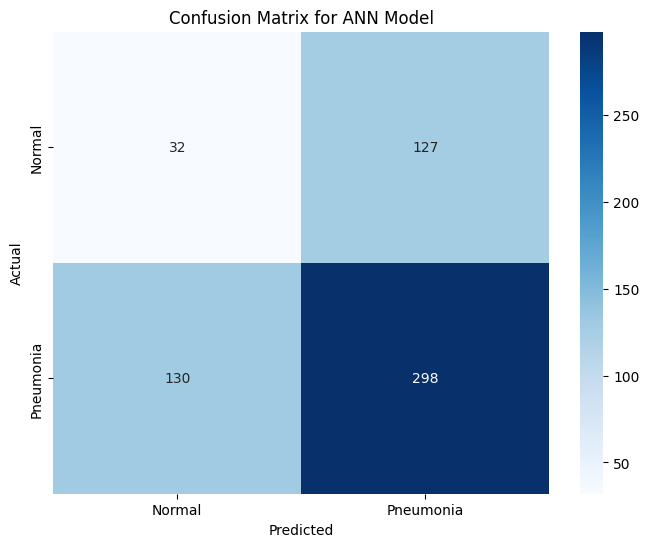

In [15]:
cm_ann = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for ANN Model')
plt.show()

In [16]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Normal", "Pneumonia"]))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.20      0.20      0.20       159
   Pneumonia       0.70      0.70      0.70       428

    accuracy                           0.56       587
   macro avg       0.45      0.45      0.45       587
weighted avg       0.56      0.56      0.56       587



In [17]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.5 MB/s eta 0:00:00


In [18]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,569 (9.36 MB)

 Trainable params: 2,453,569 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_cnn = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 91s 602ms/step - accuracy: 0.7167 - loss: 0.6085 - val_accuracy: 0.7299 - val_loss: 0.5894
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 81s 547ms/step - accuracy: 0.7613 - loss: 0.5199 - val_accuracy: 0.8513 - val_loss: 0.3374
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 82s 555ms/step - accuracy: 0.8591 - loss: 0.3364 - val_accuracy: 0.8564 - val_loss: 0.3104
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 85s 581ms/step - accuracy: 0.8994 - loss: 0.2529 - val_accuracy: 0.9043 - val_loss: 0.2453
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 81s 547ms/step - accuracy: 0.8883 - loss: 0.2779 - val_accuracy: 0.9094 - val_loss: 0.2443
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 80s 546ms/step - accuracy: 0.8941 - loss: 0.2572 - val_accuracy: 0.8821 - val_loss: 0.2717
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 81s 548ms/step - accuracy: 0.9055 - loss: 0.2355 - val_accuracy: 0.8615 - val_loss: 0.3851
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 80s 545ms/step - accuracy: 0.9089 - loss: 0

In [21]:
y_true_cnn = test_data.classes
y_pred_cnn = (cnn_model.predict(test_data) > 0.5).astype("int32")

print("\nClassification Report for CNN Model:")
print(classification_report(y_true_cnn, y_pred_cnn, target_names=["Normal", "Pneumonia"]))

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step

Classification Report for CNN Model:
              precision    recall  f1-score   support

      Normal       0.31      0.20      0.24       159
   Pneumonia       0.74      0.83      0.78       428

    accuracy                           0.66       587
   macro avg       0.52      0.52      0.51       587
weighted avg       0.62      0.66      0.64       587



In [22]:
y_pred_prob_cnn = cnn_model.predict(test_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 543ms/step


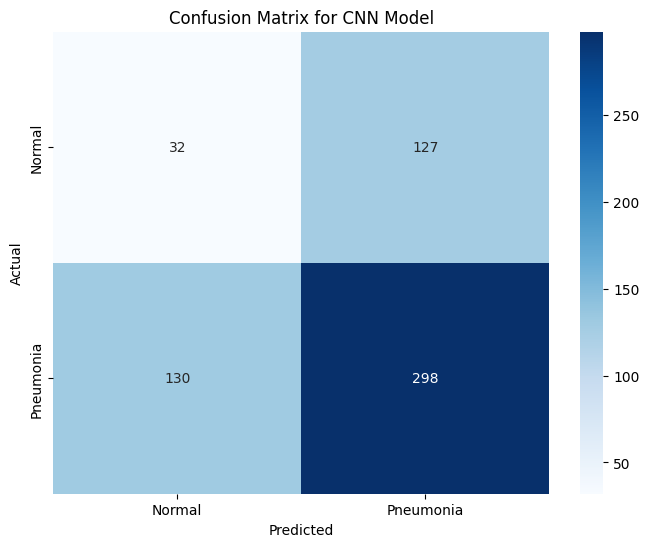

In [23]:
cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN Model')
plt.show()

In [ ]:
!pip install tf-keras-vis

In [ ]:
# Get a batch of images and labels from the test_data generator
images, labels = next(test_data)

# Select a single image from the batch
sample_image = images[0]

# Expand the dimensions of the selected image to match the input shape of the model
sample_image = np.expand_dims(sample_image, axis=0)

print("Shape of the selected sample image:", sample_image.shape)

Shape of the selected sample image: (1, 64, 64, 3)


In [ ]:
def compute_saliency_map(model, img_array, target_class_index):
    """Computes the saliency map for a given image and target class."""
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        predictions = model(img_array)
        loss = predictions[:, target_class_index]
    # Get the gradients of the outputs with respect to the input image
    grads = tape.gradient(loss, img_array)
    return grads


In [ ]:
print(test_data.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
# The model has a single output neuron with sigmoid activation,
# so index 0 represents the probability of the positive class (PNEUMONIA).
target_class_index = 0

# Convert sample_image to a TensorFlow Tensor
sample_image_tensor = tf.convert_to_tensor(sample_image, dtype=tf.float32)

# Compute the saliency map
saliency_map = compute_saliency_map(cnn_model, sample_image_tensor, target_class_index)

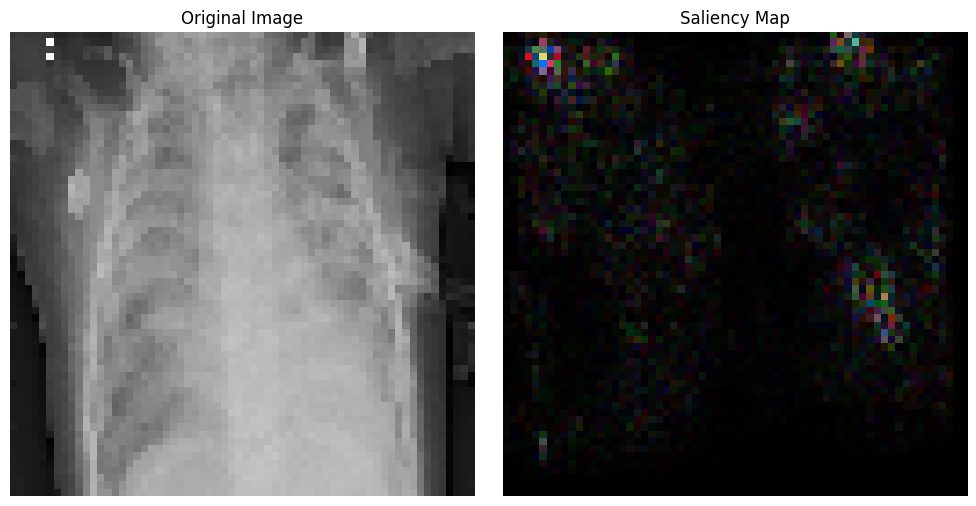

In [ ]:
# Postprocess the saliency map: take absolute value and normalize
saliency_map_abs = tf.abs(saliency_map)
saliency_map_normalized = saliency_map_abs / tf.reduce_max(saliency_map_abs)

# Reshape the saliency map to remove the batch dimension
saliency_map_display = saliency_map_normalized[0]

# Display the original image and the saliency map side-by-side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(sample_image[0]) # Remove batch dimension for displaying
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Saliency Map")
plt.imshow(saliency_map_display, cmap='hot')
plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


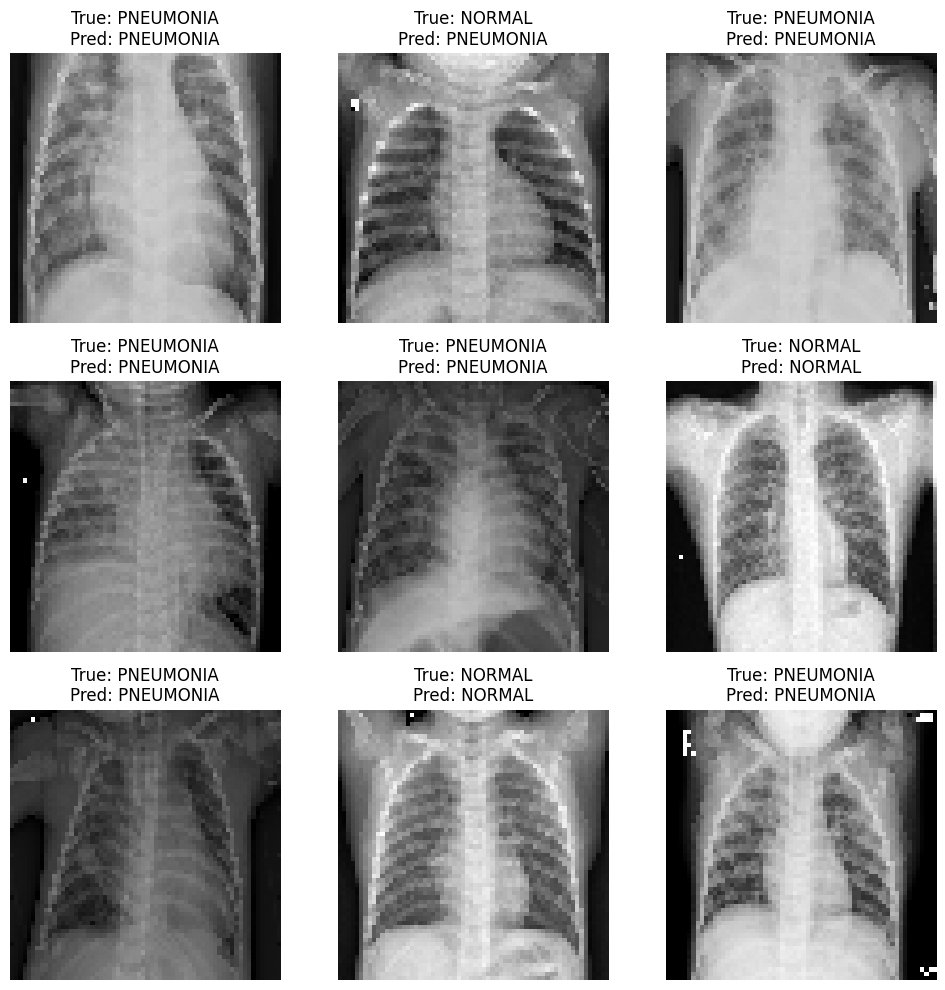

In [24]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the test_data generator
images, true_labels = next(test_data)

# Make predictions on this batch
predicted_probs = cnn_model.predict(images)
predicted_labels = (predicted_probs > 0.5).astype("int32").flatten()

# Map numerical labels back to class names
class_names = list(test_data.class_indices.keys())
true_class_names = [class_names[int(label)] for label in true_labels]
predicted_class_names = [class_names[int(label)] for label in predicted_labels]

# Display a few images with their predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(min(9, len(images))): # Display up to 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"True: {true_class_names[i]}\nPred: {predicted_class_names[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()